In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### Data Visualization

<AxesSubplot:xlabel='stabf', ylabel='tau1'>

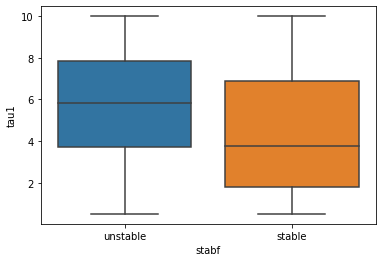

In [4]:
sns.boxplot(x = 'stabf', y = 'tau1', data = data)

<AxesSubplot:xlabel='stabf', ylabel='tau2'>

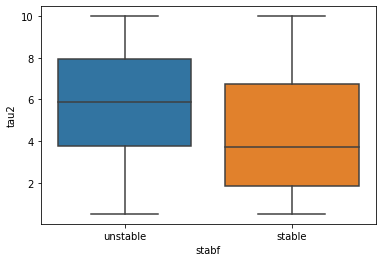

In [5]:
sns.boxplot(x = 'stabf', y = 'tau2', data = data)

<AxesSubplot:xlabel='stabf', ylabel='tau3'>

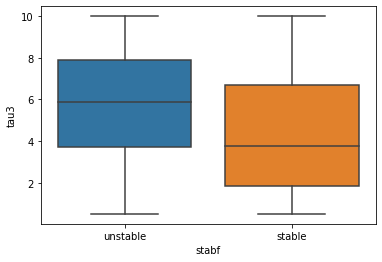

In [6]:
sns.boxplot(x = 'stabf', y = 'tau3', data = data)

<AxesSubplot:xlabel='stabf', ylabel='p1'>

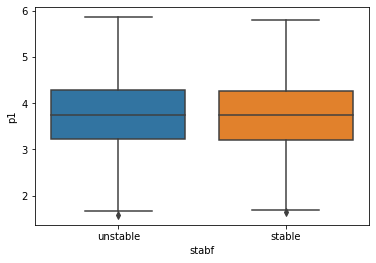

In [7]:
sns.boxplot(x = 'stabf', y = 'p1', data = data)

<AxesSubplot:xlabel='p1'>

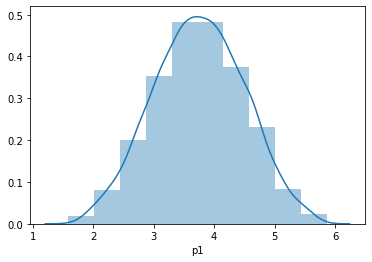

In [8]:
sns.distplot(data['p1'], bins =10)

### Data cleaning and preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [10]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [11]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [12]:
data.drop('stab', axis = 1, inplace = True)

In [13]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [14]:
X = data.drop('stabf', axis = 1)
y  = data['stabf']

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
y = LabelEncoder().fit_transform(y)

In [17]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [18]:
sc = StandardScaler()

X = sc.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

### Model Trainning

In [20]:
from sklearn.metrics import f1_score

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [22]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
RFC_pred = RFC.predict(X_test)

In [24]:
f1_score(y_test, RFC_pred)

0.9408147578785548

In [54]:
from sklearn.metrics import accuracy_score
round((accuracy_score(y_test, RFC_pred)),4)

0.923

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
TM = DecisionTreeClassifier()

In [26]:
TM.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
TM_pred = TM.predict(X_test)

In [28]:
f1_score(y_test, TM_pred)

0.8920807453416149

## LightGBM

In [29]:
from lightgbm import LGBMClassifier
LGM = LGBMClassifier()

In [30]:
LGM.fit(X_train, y_train)

LGBMClassifier()

In [31]:
LGM_pred = LGM.predict(X_test)

In [32]:
f1_score(y_test, LGM_pred)

0.9537037037037037

In [56]:
round((accuracy_score(y_test, LGM_pred)),4)

0.94

### XGBoost

In [33]:
from xgboost import XGBClassifier
XG = XGBClassifier()

In [34]:
XG.fit(X_train, y_train)

XGBClassifier()

In [35]:
XG_pred = XG.predict(X_test)

In [36]:
f1_score(y_test, XG_pred)

0.9388530193695404

In [55]:
round((accuracy_score(y_test, XG_pred)),4)

0.9195

### Hyperparameters Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
n_estimators = [50,100,300,500,1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf =[1,2,4,6,8]
max_features = ['auto', 'sqrt', 'log2', None]

HPG = {'n_estimators':[50,100,300,500,1000], 'min_samples_split': [2,3,5,7,9], 'min_samples_leaf':[1,2,4,6,8], 'max_features':['auto', 'sqrt', 'log2', None]}

RSCV = RandomizedSearchCV(RFC, HPG, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)

In [58]:
RCV_M = RSCV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished


In [59]:
print('Best Score: %s' % RCV_M.best_score_)
print('Best Hyperparameters: %s' % RCV_M.best_params_)

Best Score: 0.9193749999999999
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2'}


In [60]:
RCV_p= RCV_M.predict(X_test)

In [62]:
accuracy_score(y_test,RCV_p)

0.9215

### Quiz

In [51]:
tp = 355
tn = 1480
fp = 45
fn = 120
prec = tp/(tp+fp)
rec = tp/(tp+fn)
f1_s = 2* ((prec*rec)/(prec+rec))

In [52]:
f1_s

0.8114285714285715

### Feature importance

In [63]:
X1 = data.drop('stabf', axis = 1)

In [64]:
Feature_importance = pd.DataFrame(RFC.feature_importances_, index = X1.columns, columns = ['importance']). sort_values('importance', ascending = False)

In [65]:
Feature_importance 

,importance
tau2,0.127238
tau1,0.124170
tau4,0.123489
tau3,0.122000
g3,0.100077
g2,0.097849
g4,0.095341
g1,0.092732
p1,0.029699
p2,0.029590
